In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
names_filtering_patterns = ["ga1"]

In [3]:
dataframes = []
for d in os.listdir("data/fitness/"):
    for patt in names_filtering_patterns:
        if patt in d:
            dataframes.append(pd.read_csv(f"data/fitness/{d}"))
            break
df = pd.concat(dataframes, ignore_index=True)
df.rename(lambda x: x.replace("training.", ""), axis="columns", inplace=True)
df = df[[c for c in df.columns if not c.startswith("Unnamed")]]
df["evolver"] = df["solver"] + "_" + df["ea"]
df = df[df["fitness"] != "novelty"]
df = df[df["top_k_reward.top_0_reward"] > -1000]
df.head()

,top_k_reward.top_2_reward,top_k_reward.top_1_reward,fitness_std,top_k_fit.top_0_fit,top_k_healthy_reward.top_0_healthy_reward,top_k_fit.top_1_fit,fitness_3q,top_k_forward_reward.top_0_forward_reward,_step,top_k_fit.top_2_fit,...,top_k_ctrl_reward.top_1_ctrl_reward,generation,top_k_forward_reward.top_1_forward_reward,solver,ea,fitness,environment,seed,evaluation,evolver
0,195.054443,265.334320,14005.336914,251.810242,197.800003,232.238419,13.118329,106.645973,0,166.984192,...,-0.340268,0,6.674622,cgp-weighted,mu+lambda-ga1,weighted-1-1-1-unhealthy_termination,walker2d,0,0,cgp-weighted_mu+lambda-ga1
1,134.288651,244.664307,35.995911,258.548737,255.400009,179.769119,25.004112,6.169266,1,137.672470,...,-0.550475,1,9.814757,cgp-weighted,mu+lambda-ga1,weighted-1-1-1-unhealthy_termination,walker2d,0,100,cgp-weighted_mu+lambda-ga1
2,438.879486,614.376892,82.997490,550.358154,515.000000,498.432129,31.657225,-6.002283,2,355.028290,...,-1.132740,2,24.909781,cgp-weighted,mu+lambda-ga1,weighted-1-1-1-unhealthy_termination,walker2d,0,200,cgp-weighted_mu+lambda-ga1
3,450.373047,566.381653,9959.811523,707.522278,473.600006,588.700195,29.952276,88.499741,3,493.844360,...,-0.690242,3,-6.728067,cgp-weighted,mu+lambda-ga1,weighted-1-1-1-unhealthy_termination,walker2d,0,300,cgp-weighted_mu+lambda-ga1
4,1005.351990,1005.403748,14032.178711,1008.439392,735.400024,1007.328003,23.181581,10.942503,4,1004.515991,...,-1.585450,4,7.989365,cgp-weighted,mu+lambda-ga1,weighted-1-1-1-unhealthy_termination,walker2d,0,400,cgp-weighted_mu+lambda-ga1


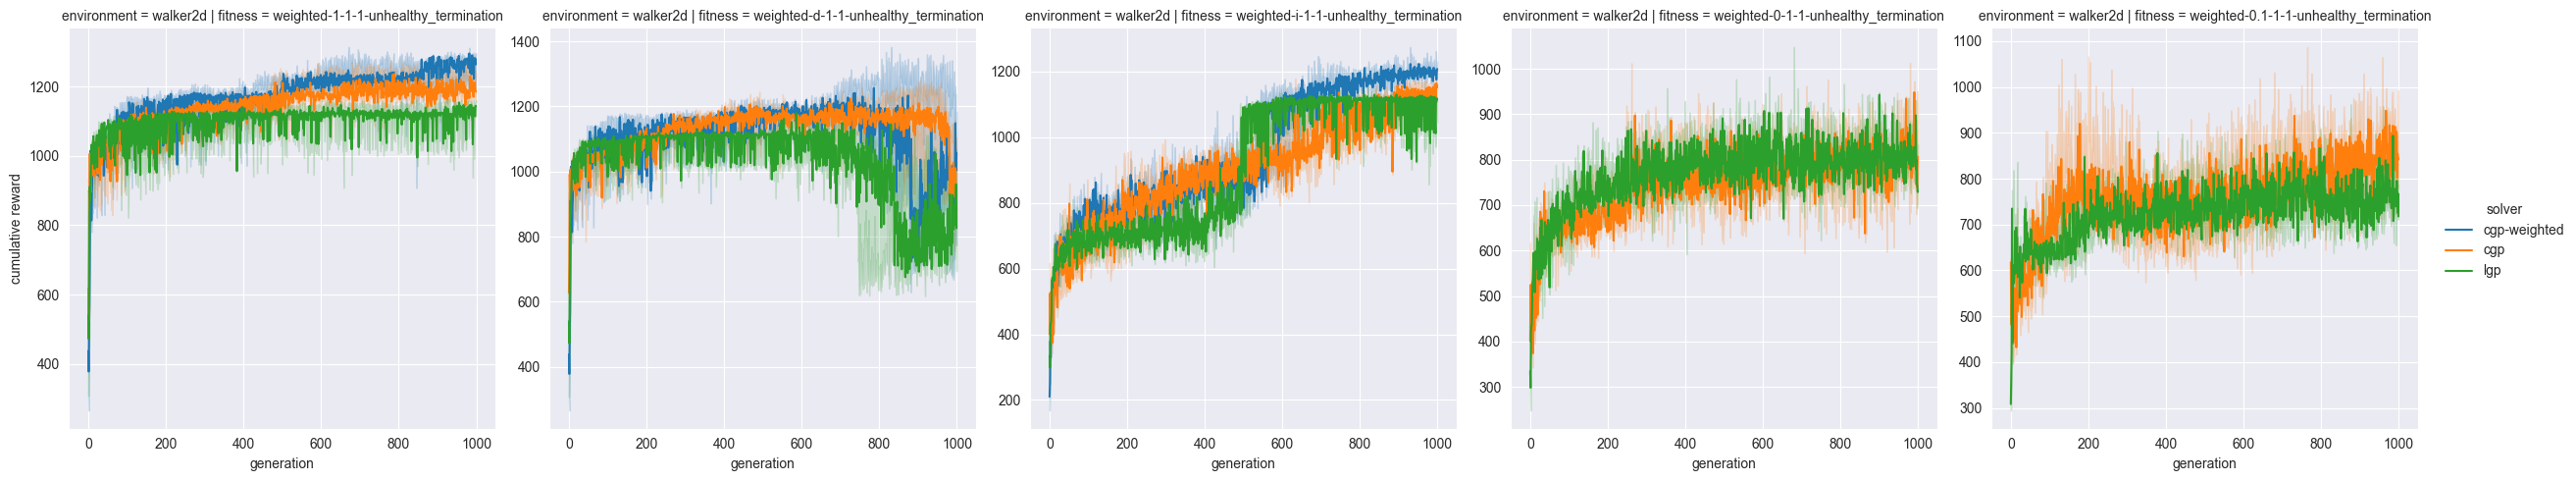

In [4]:
x_axis = "generation"
g = sns.relplot(
    data=df,
    col="fitness",
    row="environment",
    kind="line",
    x=x_axis,
    y="top_k_reward.top_0_reward",
    hue="solver",
    estimator="median",
    errorbar=("pi", 50),
    facet_kws=dict(sharey=False)
)
g.set_xlabels(x_axis)
g.set_ylabels("cumulative reward")
plt.show()

In [5]:
evo_rewards = pd.melt(df,
                      id_vars=["generation", "environment", "solver", "ea", "seed", "evolver", "fitness"],
                      value_vars=["top_k_reward.top_0_reward", "top_k_ctrl_reward.top_0_ctrl_reward",
                                  "top_k_forward_reward.top_0_forward_reward",
                                  "top_k_healthy_reward.top_0_healthy_reward"])
evo_rewards["reward_type"] = evo_rewards["variable"].apply(
    lambda x: x.replace("top_0_reward", "top_0_cumulative_reward").split("_")[-2])
evo_rewards["termination"] = evo_rewards["fitness"].apply(lambda x: x.split("-")[-1].split("_")[0])
evo_rewards.head()

,generation,environment,solver,ea,seed,evolver,fitness,variable,value,reward_type,termination
0,0,walker2d,cgp-weighted,mu+lambda-ga1,0,cgp-weighted_mu+lambda-ga1,weighted-1-1-1-unhealthy_termination,top_k_reward.top_0_reward,304.031097,cumulative,unhealthy
1,1,walker2d,cgp-weighted,mu+lambda-ga1,0,cgp-weighted_mu+lambda-ga1,weighted-1-1-1-unhealthy_termination,top_k_reward.top_0_reward,260.984833,cumulative,unhealthy
2,2,walker2d,cgp-weighted,mu+lambda-ga1,0,cgp-weighted_mu+lambda-ga1,weighted-1-1-1-unhealthy_termination,top_k_reward.top_0_reward,508.350098,cumulative,unhealthy
3,3,walker2d,cgp-weighted,mu+lambda-ga1,0,cgp-weighted_mu+lambda-ga1,weighted-1-1-1-unhealthy_termination,top_k_reward.top_0_reward,561.182251,cumulative,unhealthy
4,4,walker2d,cgp-weighted,mu+lambda-ga1,0,cgp-weighted_mu+lambda-ga1,weighted-1-1-1-unhealthy_termination,top_k_reward.top_0_reward,744.570496,cumulative,unhealthy


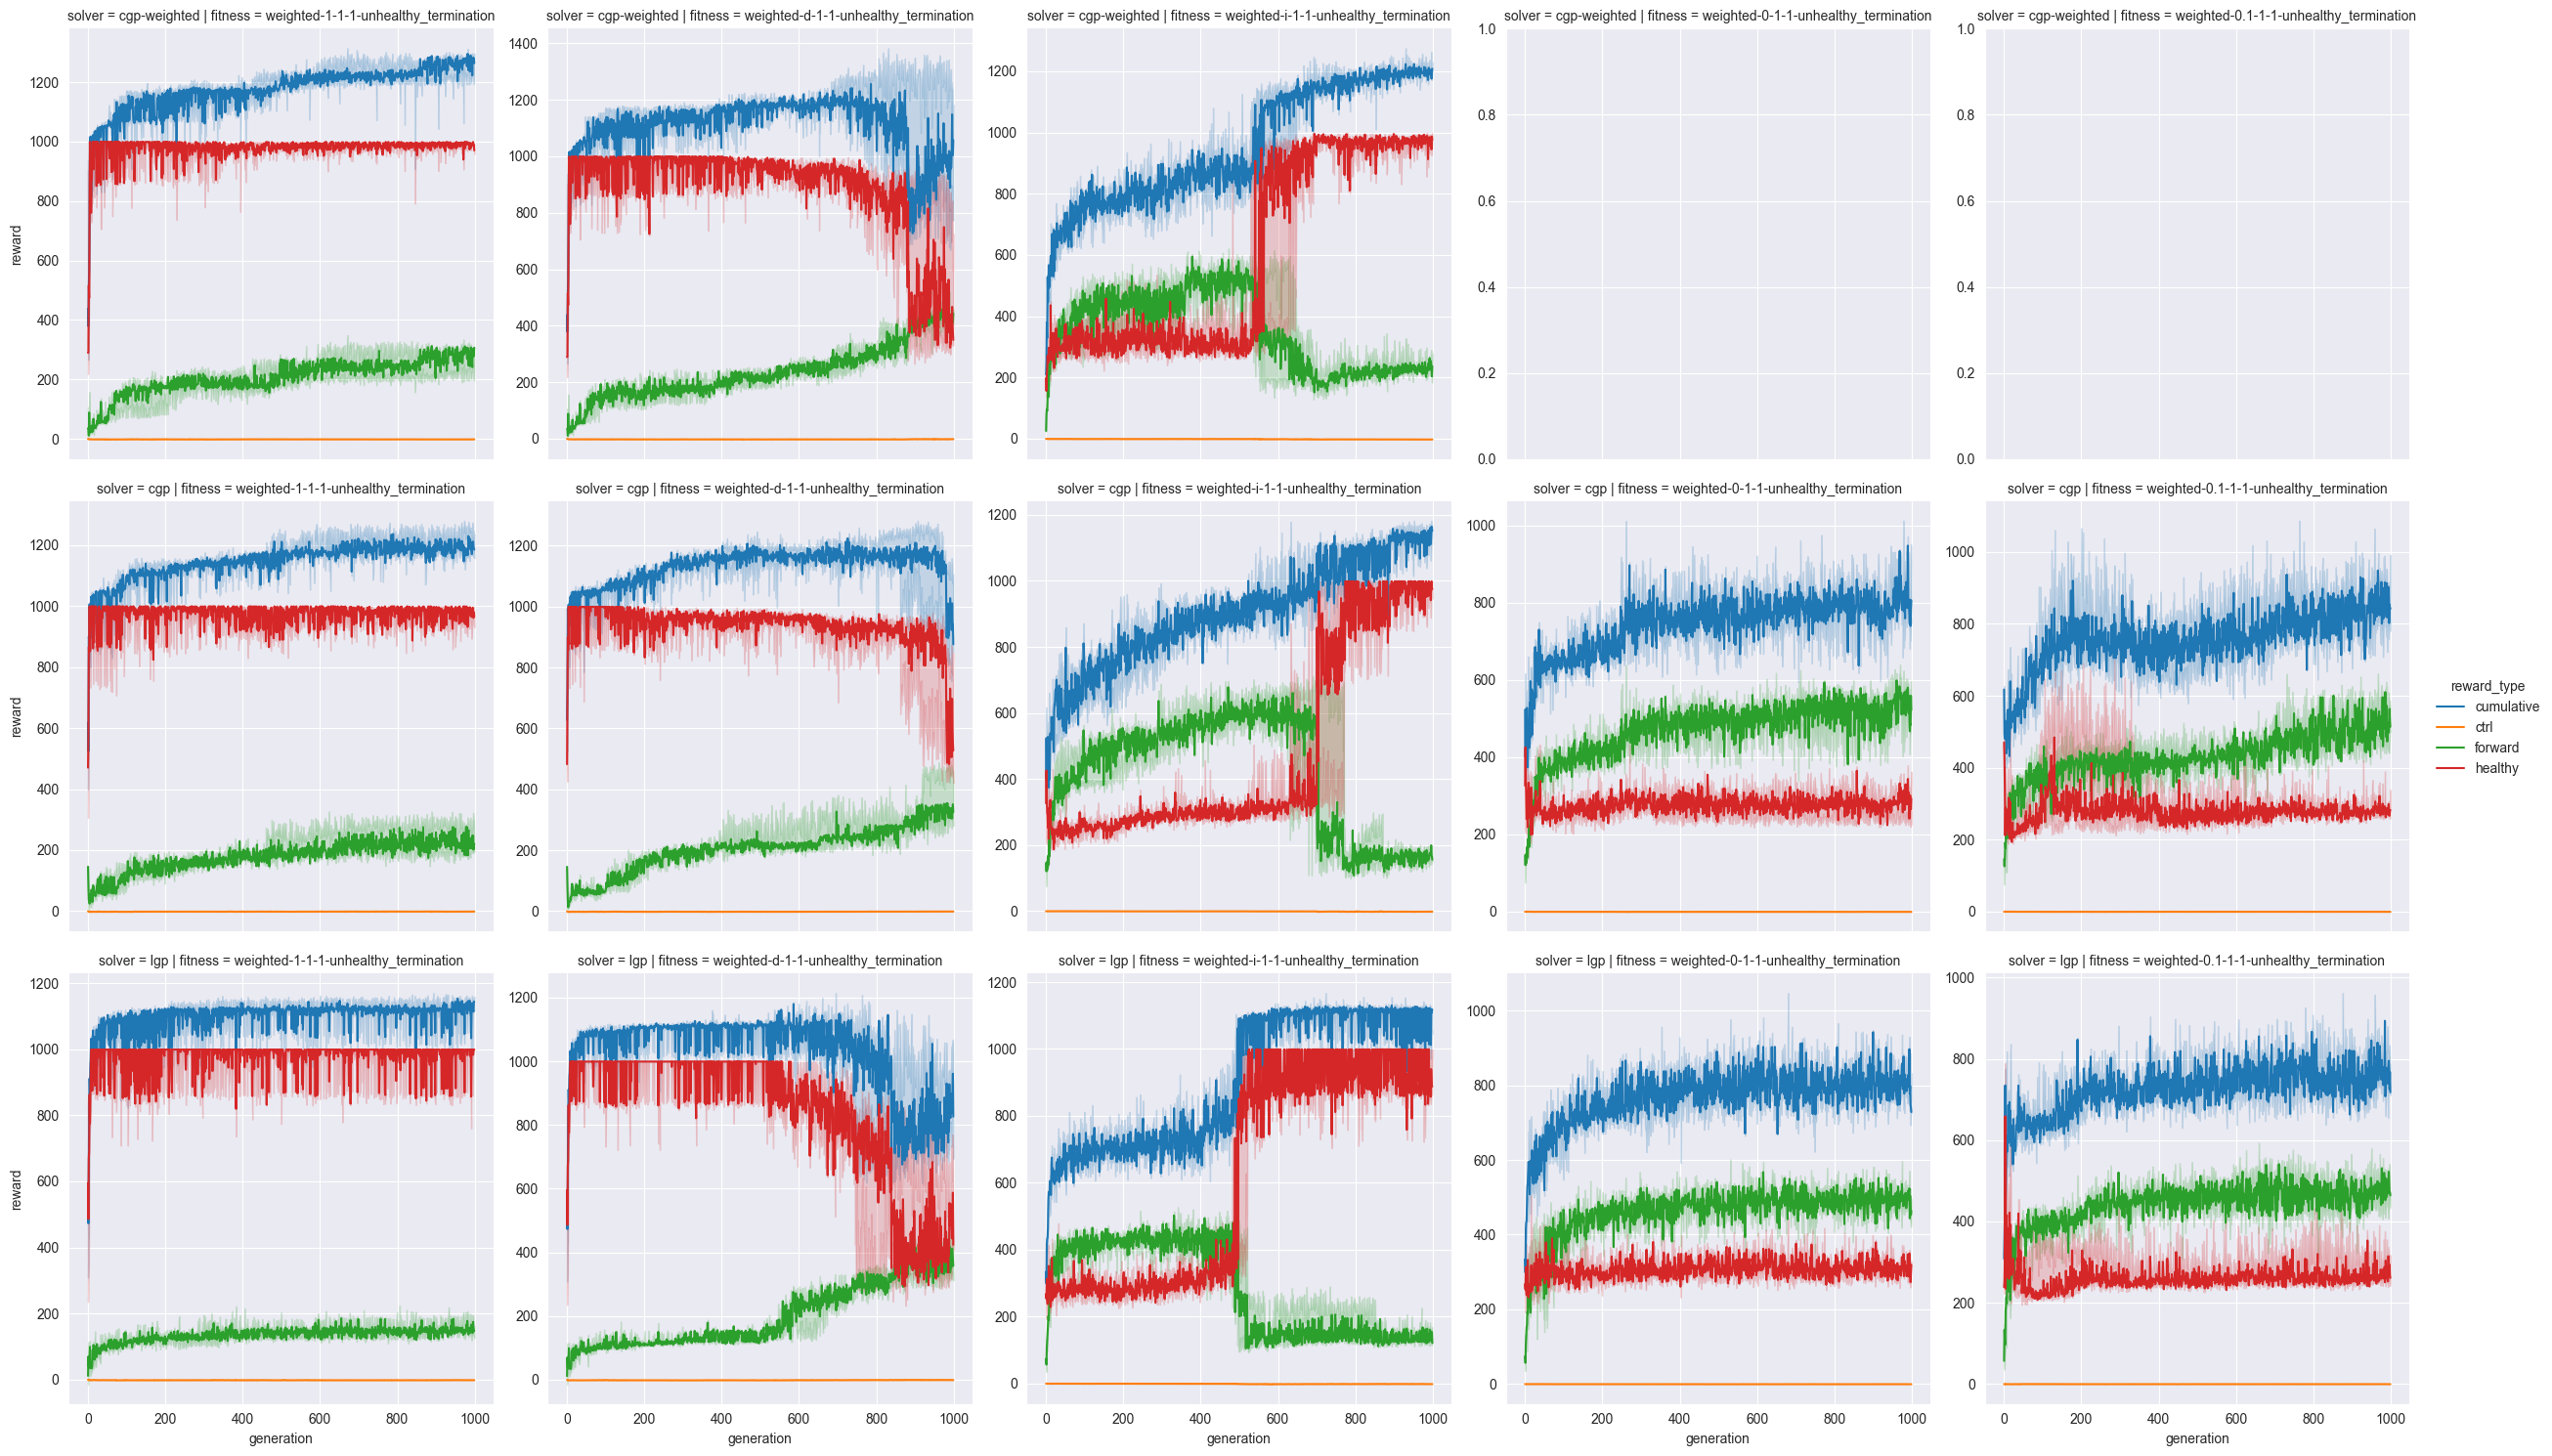

In [6]:
evo_rewards["env+solver"] = evo_rewards["environment"] + "_" + evo_rewards["solver"]
g = sns.relplot(
    data=evo_rewards,
    row="solver",
    col="fitness",
    kind="line",
    x="generation",
    y="value",
    hue="reward_type",
    estimator="median",
    errorbar=("pi", 50),
    facet_kws=dict(sharey=False)
)
g.set_xlabels("generation")
g.set_ylabels("reward")
plt.show()

In [7]:
reward_dfs = []
for rew_file in os.listdir("data/rewards"):
    for patt in names_filtering_patterns:
        if patt in rew_file:
            tmp = pd.read_csv(f"data/rewards/{rew_file}")
            env, solver, ea, fitness, seed, gen = tuple(rew_file.replace("_termination", "-termination").split("_"))
            tmp["environment"] = env
            tmp["solver"] = solver
            tmp["ea"] = ea
            tmp["fitness"] = fitness
            tmp["seed"] = seed
            tmp["generation"] = gen.replace(".csv", "")
            reward_dfs.append(tmp.reset_index().rename(columns={"index": "timestep"}))
            break
reward_df = pd.concat(reward_dfs, ignore_index=True)
reward_df["evolver"] = reward_df["solver"] + "_" + reward_df["ea"]
reward_df = reward_df[reward_df["fitness"] != "novelty"]
reward_df = pd.melt(reward_df,
                    id_vars=["timestep", "environment", "solver", "ea", "fitness", "seed", "generation", "evolver",
                             "cumulative"],
                    value_vars=["healthy", "ctrl", "forward", "total"])
reward_df.head()

,timestep,environment,solver,ea,fitness,seed,generation,evolver,cumulative,variable,value
0,0,walker2d,cgp-weighted,mu+lambda-ga1,weighted-1-1-1-unhealthy-termination,0,999,cgp-weighted_mu+lambda-ga1,111.10694,healthy,1.0
1,1,walker2d,cgp-weighted,mu+lambda-ga1,weighted-1-1-1-unhealthy-termination,0,999,cgp-weighted_mu+lambda-ga1,111.10694,healthy,1.0
2,2,walker2d,cgp-weighted,mu+lambda-ga1,weighted-1-1-1-unhealthy-termination,0,999,cgp-weighted_mu+lambda-ga1,111.10694,healthy,1.0
3,3,walker2d,cgp-weighted,mu+lambda-ga1,weighted-1-1-1-unhealthy-termination,0,999,cgp-weighted_mu+lambda-ga1,111.10694,healthy,1.0
4,4,walker2d,cgp-weighted,mu+lambda-ga1,weighted-1-1-1-unhealthy-termination,0,999,cgp-weighted_mu+lambda-ga1,111.10694,healthy,1.0


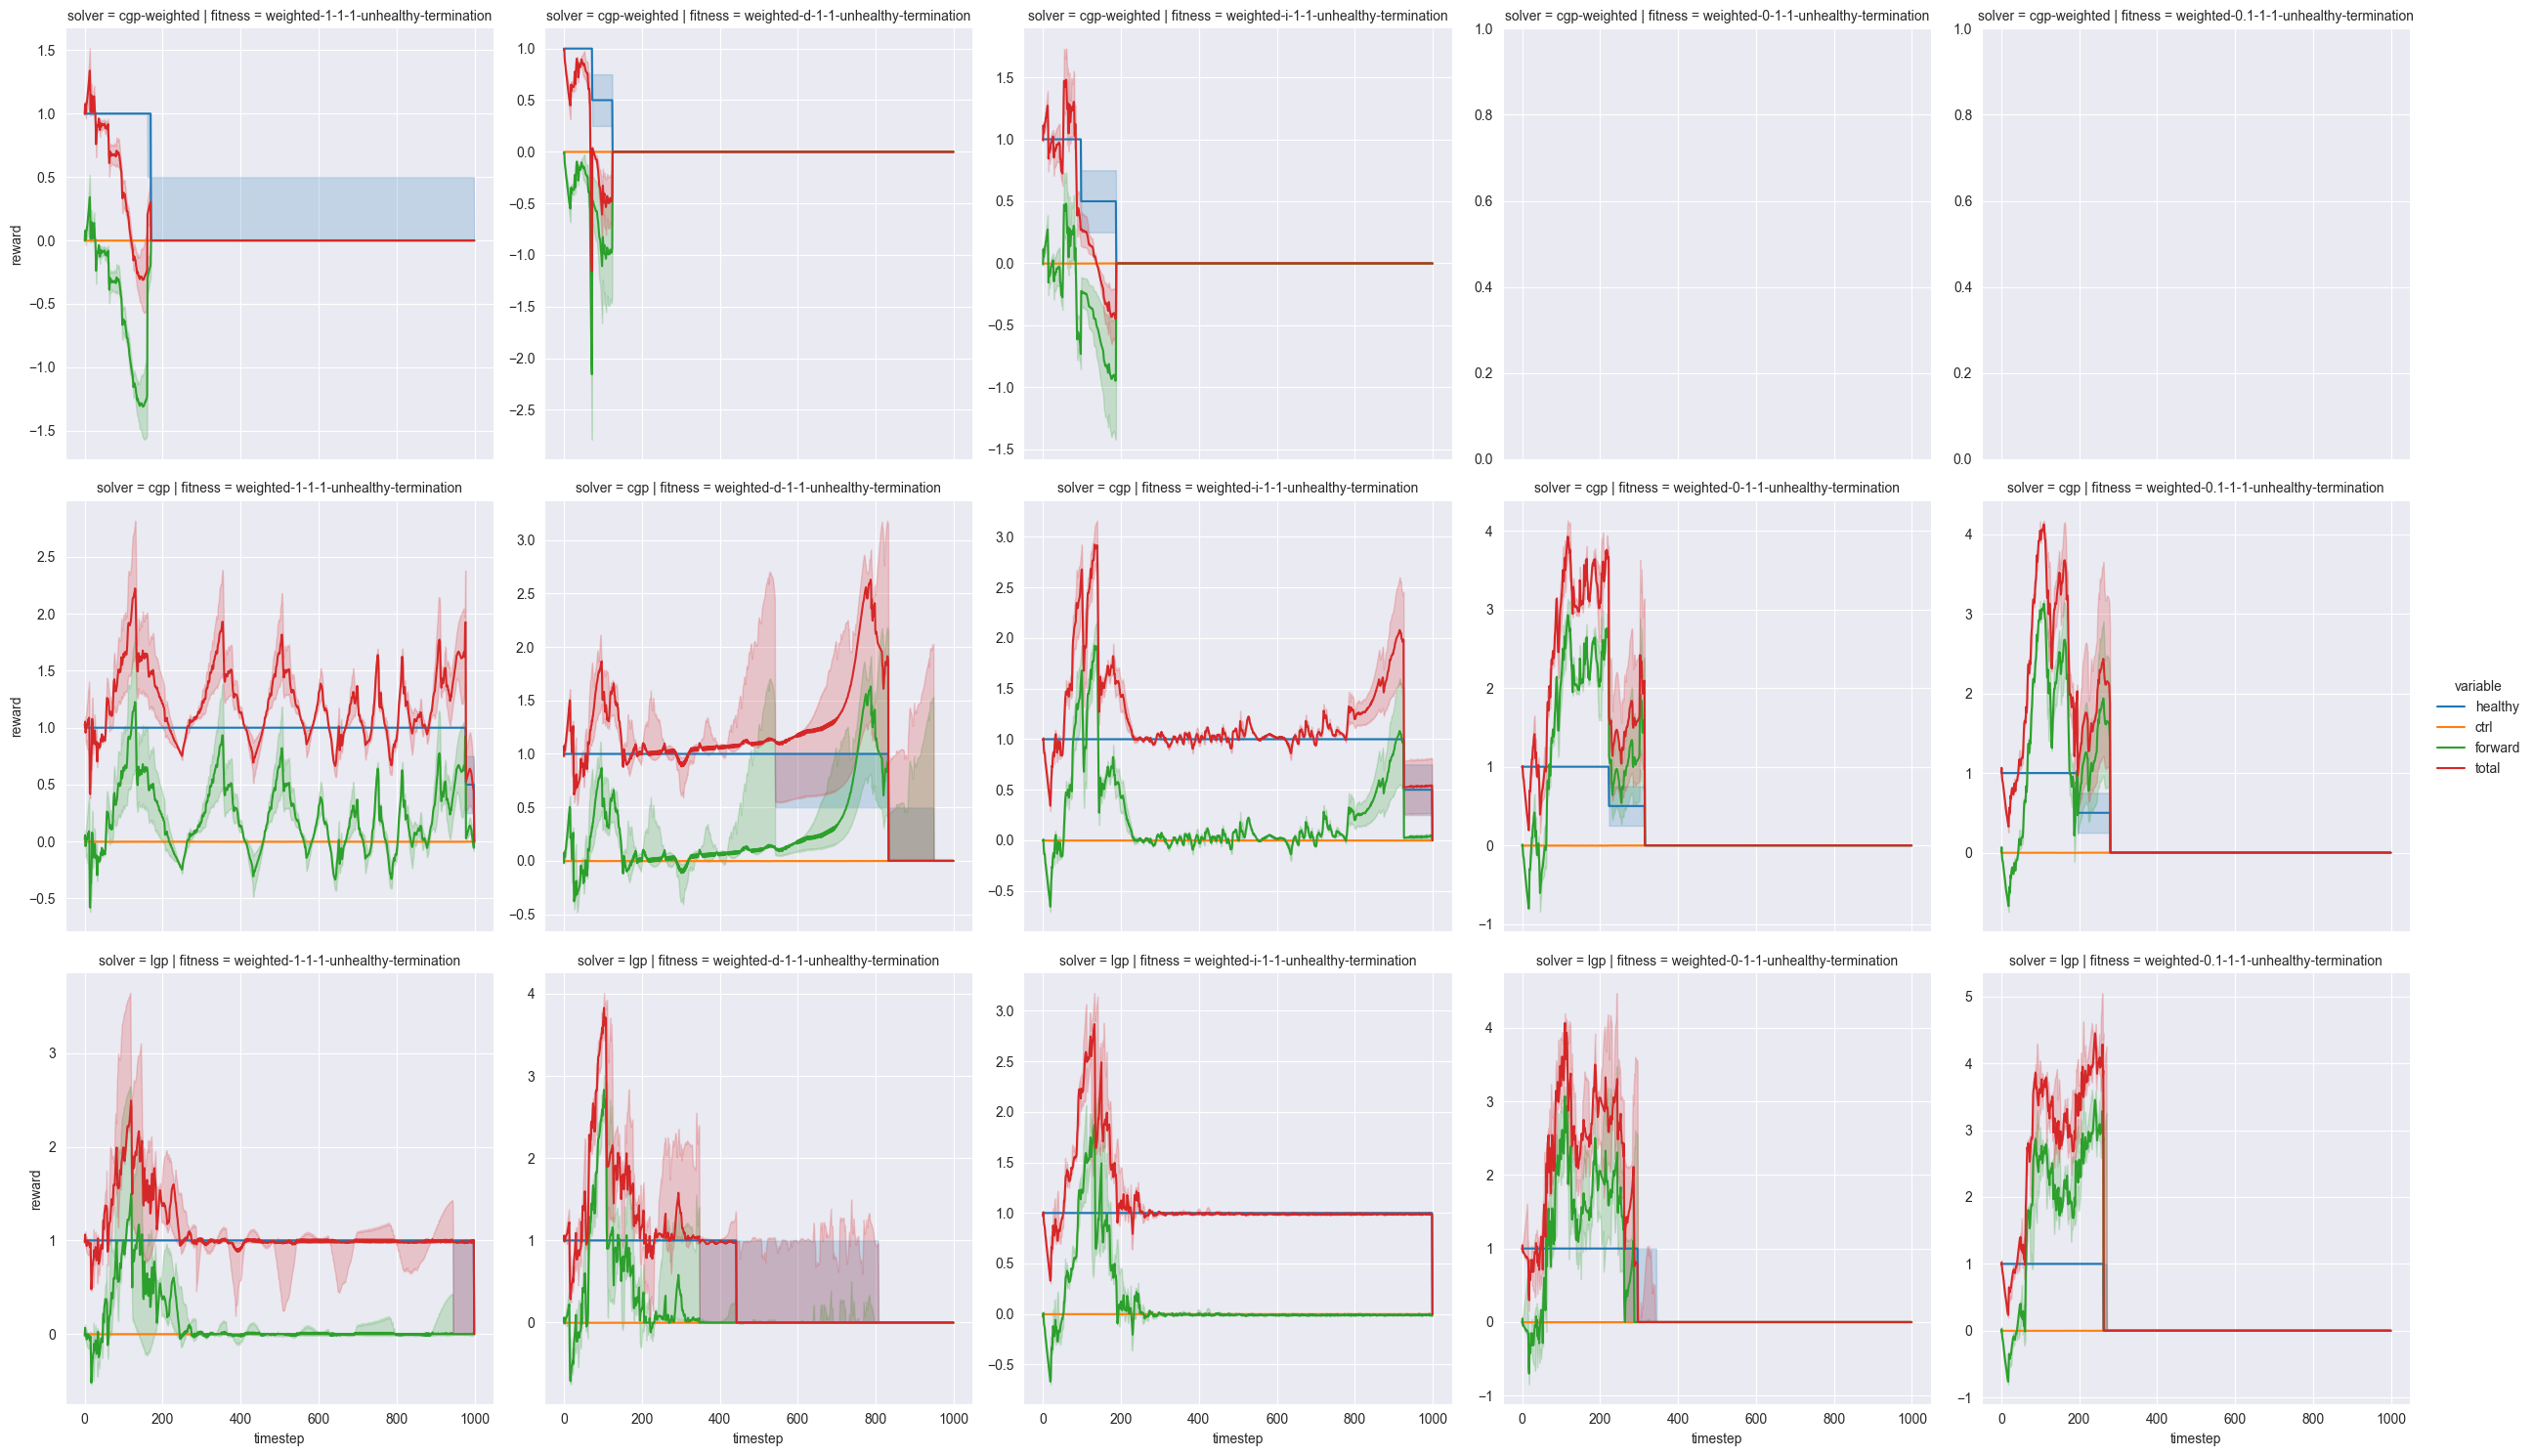

In [8]:
g = sns.relplot(
    data=reward_df,
    row="solver",
    col="fitness",
    kind="line",
    x="timestep",
    y="value",
    hue="variable",
    estimator="median",
    errorbar=("pi", 50),
    facet_kws=dict(sharey=False)
)
g.set_xlabels("timestep")
g.set_ylabels("reward")
plt.show()

In [9]:
graph_dfs = []
for d in os.listdir("data/graph_size/"):
    for patt in names_filtering_patterns:
        if patt in d:
            graph_dfs.append(pd.read_csv(f"data/graph_size/{d}"))
            break
graph_sizes = pd.concat(graph_dfs, ignore_index=True)
graph_sizes["relative_size"] = graph_sizes["graph_size"] / graph_sizes["max_size"]
graph_sizes["evolver"] = graph_sizes["solver"] + "_" + graph_sizes["ea"]
graph_sizes = graph_sizes[[c for c in graph_sizes.columns if not c.startswith("Unnamed")]]
graph_sizes = graph_sizes[graph_sizes["fitness"] != "novelty"]
graph_sizes.head()

,seed,generation,evaluation,graph_size,max_size,solver,ea,fitness,environment,relative_size,evolver
0,0,599,5995995995995995995995995995995995995995995995...,26,67,cgp-weighted,mu+lambda-ga1,weighted-1-1-1-unhealthy_termination,walker2d,0.388060,cgp-weighted_mu+lambda-ga1
1,0,99,9999999999999999999999999999999999999999999999...,23,67,cgp-weighted,mu+lambda-ga1,weighted-1-1-1-unhealthy_termination,walker2d,0.343284,cgp-weighted_mu+lambda-ga1
2,0,199,1991991991991991991991991991991991991991991991...,23,67,cgp-weighted,mu+lambda-ga1,weighted-1-1-1-unhealthy_termination,walker2d,0.343284,cgp-weighted_mu+lambda-ga1
3,0,799,7997997997997997997997997997997997997997997997...,27,67,cgp-weighted,mu+lambda-ga1,weighted-1-1-1-unhealthy_termination,walker2d,0.402985,cgp-weighted_mu+lambda-ga1
4,0,399,3993993993993993993993993993993993993993993993...,24,67,cgp-weighted,mu+lambda-ga1,weighted-1-1-1-unhealthy_termination,walker2d,0.358209,cgp-weighted_mu+lambda-ga1


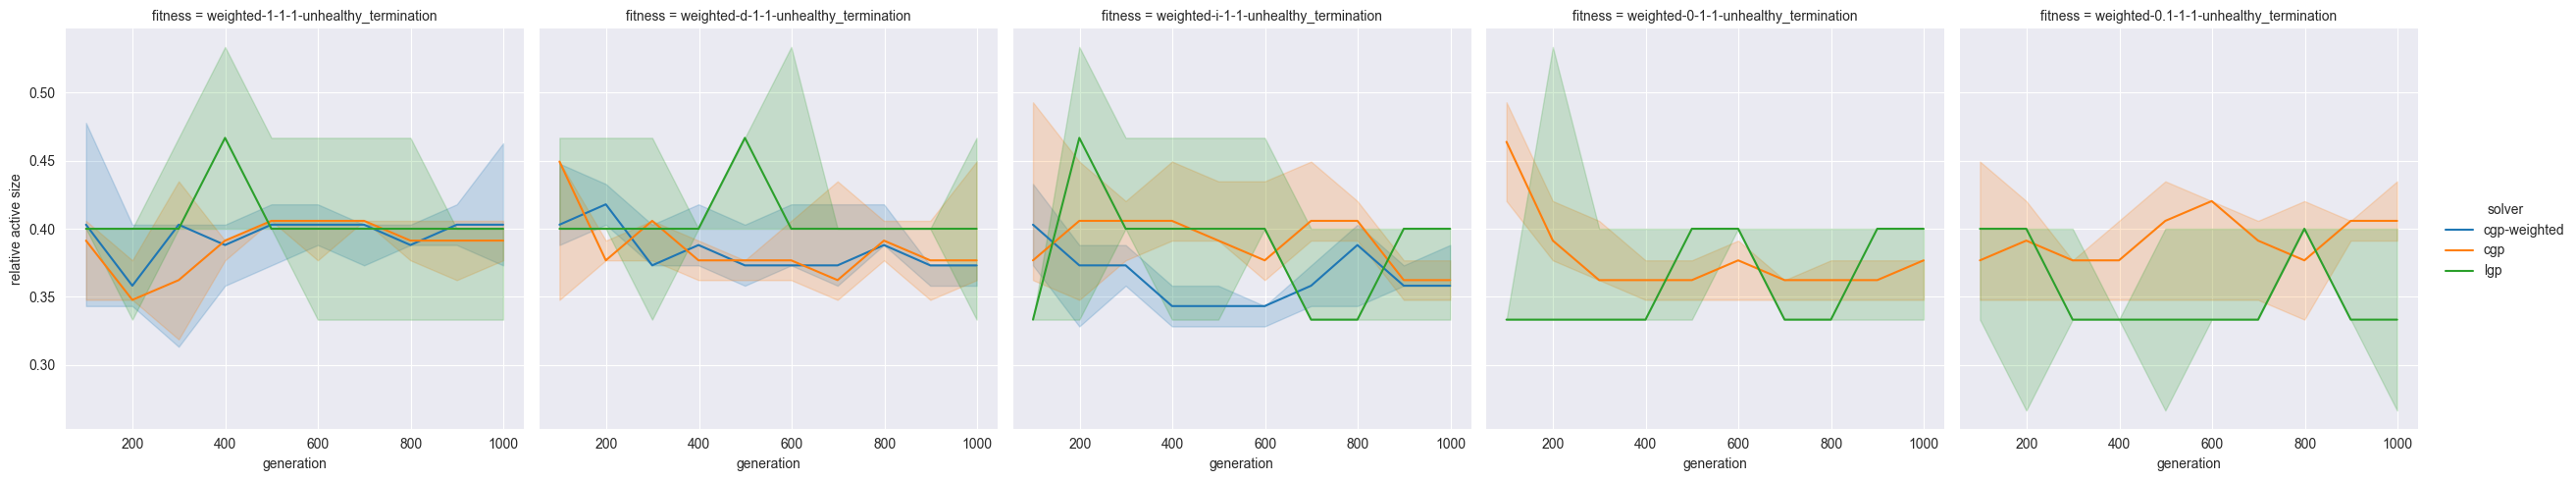

In [10]:
g = sns.relplot(
    data=graph_sizes[(graph_sizes["generation"] < 1000)],
    col="fitness",
    kind="line",
    x="generation",
    y="relative_size",
    hue="solver",
    estimator="median",
    errorbar=("pi", 50)
)
g.set_xlabels("generation")
g.set_ylabels("relative active size")
plt.show()